### Supplement Sales EDA 
https://www.kaggle.com/datasets/zahidmughal2343/supplement-sales-data


In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [2]:
df = pd.read_csv('..\Supplement_Sales_Weekly_Expanded.csv', parse_dates=['Date'], index_col='Date')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\conif\AppData\Local\Temp\ipykernel_6972\4252652465.py:1: SyntaxWarning: invalid escape sequence '\S'
  df = pd.read_csv('..\Supplement_Sales_Weekly_Expanded.csv', parse_dates=['Date'], index_col='Date')


,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
Date,,,,,,,,,
2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart
2020-01-06,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon
2020-01-06,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon
2020-01-06,Multivitamin,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart
2020-01-06,Pre-Workout,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb


In [3]:
df.isna().sum()

Product Name      0
Category          0
Units Sold        0
Price             0
Revenue           0
Discount          0
Units Returned    0
Location          0
Platform          0
dtype: int64

In [4]:
df.shape

(4384, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4384 entries, 2020-01-06 to 2025-03-31
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product Name    4384 non-null   object 
 1   Category        4384 non-null   object 
 2   Units Sold      4384 non-null   int64  
 3   Price           4384 non-null   float64
 4   Revenue         4384 non-null   float64
 5   Discount        4384 non-null   float64
 6   Units Returned  4384 non-null   int64  
 7   Location        4384 non-null   object 
 8   Platform        4384 non-null   object 
dtypes: float64(3), int64(2), object(4)
memory usage: 342.5+ KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,Units Sold,Price,Revenue,Discount,Units Returned
count,4384.000000,4384.000000,4384.000000,4384.000000,4384.000000
mean,150.200274,34.781229,5226.569446,0.124398,1.531478
std,12.396099,14.198309,2192.491946,0.071792,1.258479
min,103.000000,10.000000,1284.000000,0.000000,0.000000
25%,142.000000,22.597500,3349.372500,0.060000,1.000000
50%,150.000000,34.720000,5173.140000,0.120000,1.000000
75%,158.000000,46.712500,7009.960000,0.190000,2.000000
max,194.000000,59.970000,10761.850000,0.250000,8.000000


Supplement Sales - Aims
1.	To identify the most and least profitable products
2.	To identify best and worst platforms with respect to
    a. Sales of products
    b. Returns
3.	To identify the best and worst locations with respect to
    a.	Sales of products
    b.	Returns


In [8]:
df.describe(include='object')

,Product Name,Category,Location,Platform
count,4384,4384,4384,4384
unique,16,10,3,3
top,Whey Protein,Vitamin,Canada,iHerb
freq,274,822,1507,1499


In [9]:
df.groupby("Date").aggregate({'Revenue': 'sum', 'Units Sold': 'sum', 'Units Returned' : 'sum'}).reset_index().head()

,Date,Revenue,Units Sold,Units Returned
0,2020-01-06,71848.56,2406,19
1,2020-01-13,72416.18,2374,27
2,2020-01-20,76152.42,2370,26
3,2020-01-27,70306.73,2397,29
4,2020-02-03,98011.64,2384,34


Text(0.5, 1.0, 'Revenue Over Time')

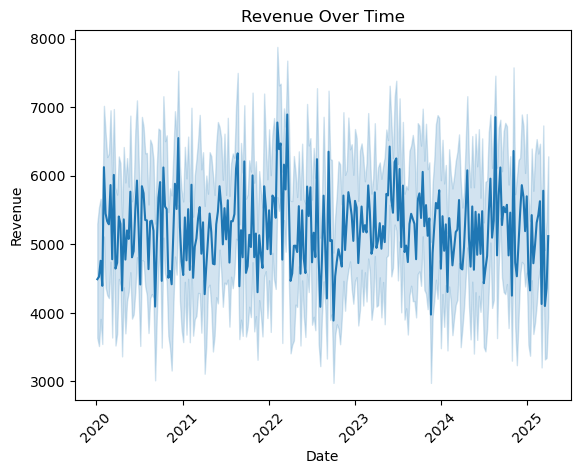

In [10]:
sns.lineplot(data=df, x='Date', y='Revenue')
plt.xticks(rotation=45)
plt.title('Revenue Over Time')  

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Vitamin'),
  Text(1, 0, 'Mineral'),
  Text(2, 0, 'Performance'),
  Text(3, 0, 'Protein'),
  Text(4, 0, 'Amino Acid'),
  Text(5, 0, 'Omega'),
  Text(6, 0, 'Fat Burner'),
  Text(7, 0, 'Hydration'),
  Text(8, 0, 'Herbal'),
  Text(9, 0, 'Sleep Aid')])

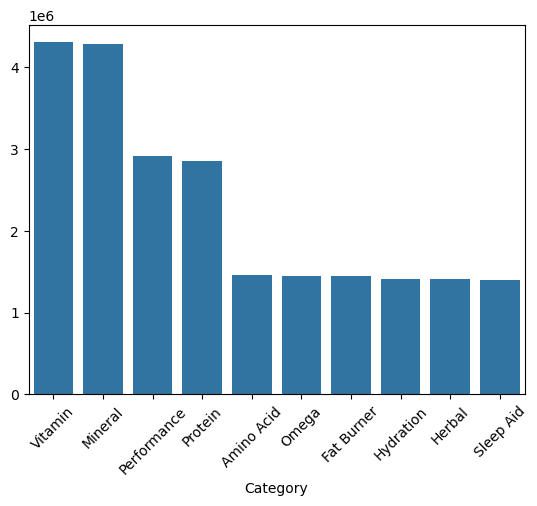

In [11]:
category_rev = df.groupby("Category")['Revenue'].sum().sort_values(ascending=False)
sns.barplot(x=category_rev.index, y=category_rev.values)
plt.xticks(rotation=45)

In [12]:
loc_platform = df.groupby(["Location", "Platform"])['Revenue'].sum().unstack().fillna(0)

In [13]:
loc_platform

Platform,Amazon,Walmart,iHerb
Location,,,
Canada,2613844.28,2518639.07,2716096.38
UK,2442671.23,2637066.25,2624222.86
USA,2612936.27,2232862.30,2514941.81


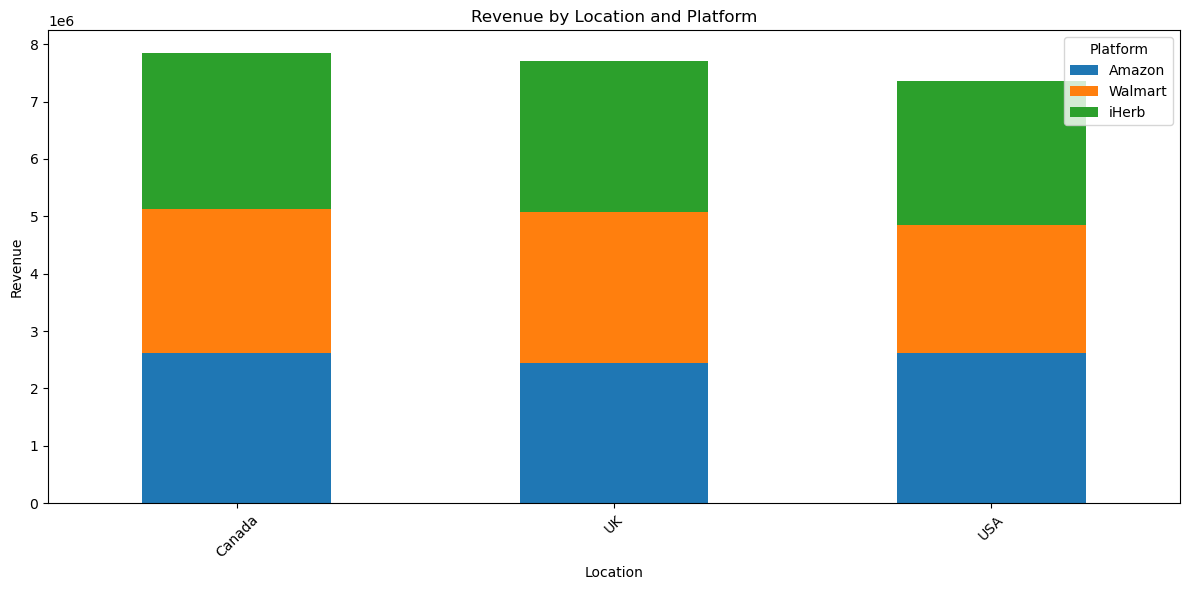

In [14]:
loc_platform.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Revenue by Location and Platform')
plt.xlabel('Location')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.legend(title='Platform')
plt.tight_layout()
plt.show()

In [15]:
top_products = df.groupby("Product Name")['Revenue'].sum().sort_values(ascending=False).head(10)

Text(0, 0.5, 'Revenue')

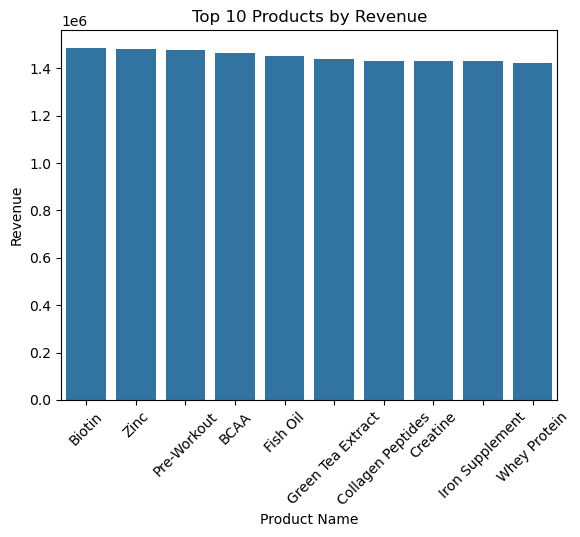

In [16]:
sns.barplot(x=top_products.index, y=top_products.values)
plt.xticks(rotation=45)
plt.title('Top 10 Products by Revenue')
plt.xlabel('Product Name')
plt.ylabel('Revenue')     

In [17]:
df["return Rate "] = df["Units Returned"] / df["Units Sold"]
df.head()

,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform,return Rate
Date,,,,,,,,,,
2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart,0.013986
2020-01-06,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon,0.000000
2020-01-06,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon,0.000000
2020-01-06,Multivitamin,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart,0.000000
2020-01-06,Pre-Workout,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb,0.019108


Text(0, 0.5, 'Return Rate')

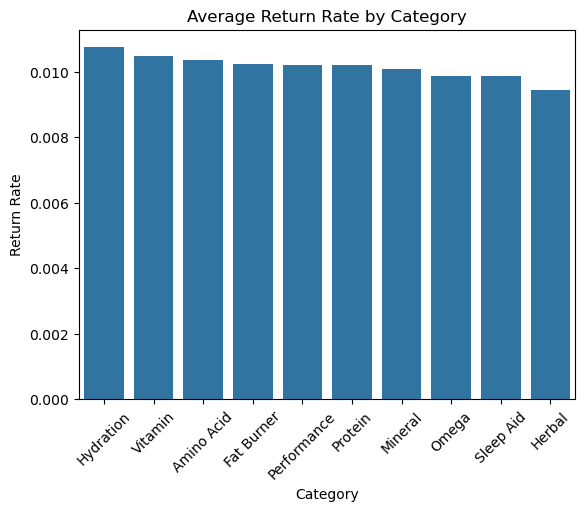

In [18]:
category_return_rate = df.groupby("Category")['return Rate '].mean().sort_values(ascending=False)
sns.barplot(x=category_return_rate.index, y=category_return_rate.values)
plt.xticks(rotation=45)
plt.title('Average Return Rate by Category')
plt.xlabel('Category')
plt.ylabel('Return Rate')

<Axes: xlabel='Discount', ylabel='Revenue'>

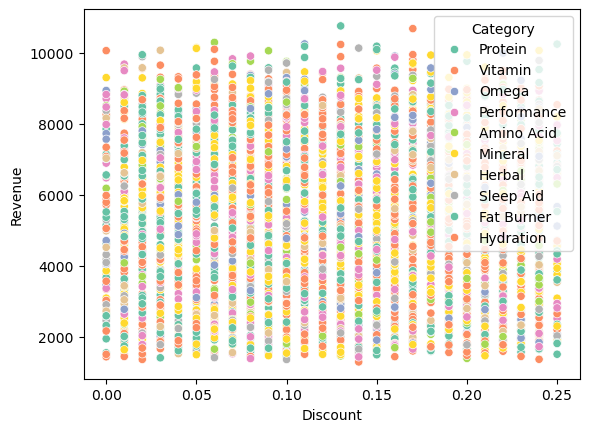

In [19]:
sns.scatterplot(data=df, x='Discount' , y='Revenue', hue='Category', palette='Set2')

<Axes: >

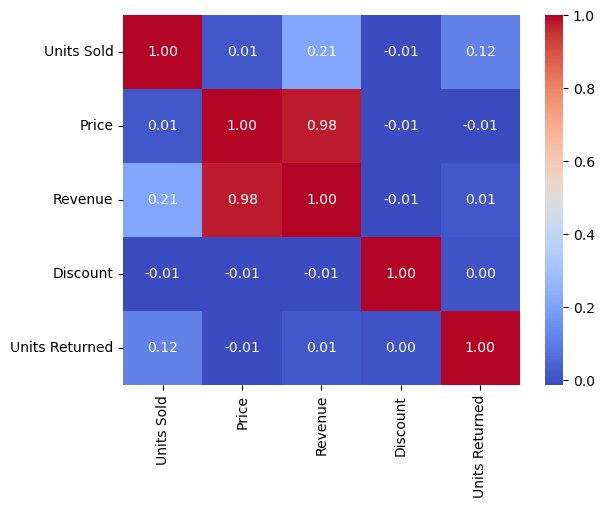

In [22]:
corr = df[['Units Sold', 'Price', 'Revenue', 'Discount', 'Units Returned']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')

In [26]:
df.reset_index(inplace=True)

In [28]:
fig = px.line(df, x='Date', y='Revenue', color='Category', title='Revenue Over Time by Category')
fig.show()